# Linear Regression with PyTorch

This is a simple implementation of a Linear Regression algorithm with the Sao Paulo beer consumption dataset available in https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# importing dataset
beer_ds = pd.read_csv("./datasets/beer_consumption.csv")
beer_ds.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1,29.799
4,2015-01-05,"23,82",21,"28,3",0,0,28.900


In [3]:
# removing the day since it is already represented as "final de semana"
beer_ds = beer_ds.iloc[:,1:]
beer_ds.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"27,3","23,9","32,5",0,0,25.461
1,"27,02","24,5","33,5",0,0,28.972
2,"24,82","22,4","29,9",0,1,30.814
3,"23,98","21,5","28,6","1,2",1,29.799
4,"23,82",21,"28,3",0,0,28.900


In [4]:
# suffling the dataset
beer_ds = shuffle(beer_ds, random_state=101)
beer_ds.reset_index(drop=True, inplace=True)
beer_ds.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"25,06","19,5","30,4","16,4",1,26.836
1,"21,36","18,5","27,7",0,0,22.356
2,"16,76","11,3","26,7",0,0,24.227
3,"17,54","15,3","20,4",0,0,20.740
4,"21,86","19,5","25,6","3,4",0,22.741


In [5]:
# verifying the types of the columns
beer_ds.dtypes
beer_ds.columns

Index(['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [6]:
# changing the types of the columns, first to string, then change the coma to dot, and then to float 
cols = ['Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)']
for c in cols:
    beer_ds[c] = beer_ds[c].astype(str)
    beer_ds[c] = beer_ds[c].str.replace(',', '.')
    beer_ds[c] = beer_ds[c].astype(float)
    
beer_ds.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,25.06,19.5,30.4,16.4,1,26.836
1,21.36,18.5,27.7,0.0,0,22.356
2,16.76,11.3,26.7,0.0,0,24.227
3,17.54,15.3,20.4,0.0,0,20.740
4,21.86,19.5,25.6,3.4,0,22.741


In [7]:
# dataset split into 20% for test and 80% for training
X = beer_ds.drop('Consumo de cerveja (litros)',axis=1).values
y = beer_ds['Consumo de cerveja (litros)'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).reshape(-1,1)
y_test = torch.FloatTensor(y_test).reshape(-1,1)

In [8]:
# creating model of linear regression 
class LinearRegression(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.bn_cont = nn.BatchNorm1d(in_features)
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [9]:
model = LinearRegression(in_features=5, out_features=1)
model

LinearRegression(
  (linear): Linear(in_features=5, out_features=1, bias=True)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [10]:
# setting the Loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [11]:
# set number of epochs and train model passing
# forward the train set and comparing with real values
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = torch.sqrt(criterion(y_pred, y_train))
    losses.append(loss)
    
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    # compute the loss, gradients and update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 24.32670975
epoch: 11  loss: 17.73037529
epoch: 21  loss: 11.96954823
epoch: 31  loss: 7.49521589
epoch: 41  loss: 5.24350882
epoch: 51  loss: 4.13516808
epoch: 61  loss: 3.33916831
epoch: 71  loss: 3.19308829
epoch: 81  loss: 3.16961360
epoch: 91  loss: 3.12900257
epoch: 101  loss: 3.09089279
epoch: 111  loss: 3.06023240
epoch: 121  loss: 3.03257704
epoch: 131  loss: 3.00538540
epoch: 141  loss: 2.97904396
epoch: 151  loss: 2.95354939
epoch: 161  loss: 2.92873096
epoch: 171  loss: 2.90459991
epoch: 181  loss: 2.88115668
epoch: 191  loss: 2.85838532
epoch: 201  loss: 2.83628225
epoch: 211  loss: 2.81484342
epoch: 221  loss: 2.79406452
epoch: 231  loss: 2.77394176
epoch: 241  loss: 2.75447059
epoch: 251  loss: 2.73564672
epoch: 261  loss: 2.71746516
epoch: 271  loss: 2.69991994
epoch: 281  loss: 2.68300509
epoch: 291  loss: 2.66671395
epoch: 301  loss: 2.65103889
epoch: 311  loss: 2.63597155
epoch: 321  loss: 2.62150311
epoch: 331  loss: 2.60762429
epoch: 341  loss: 2.5

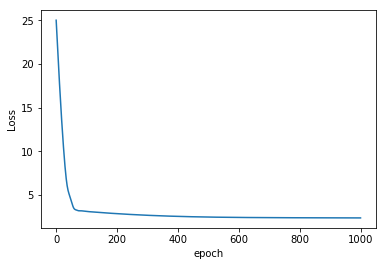

In [12]:
# plot errors by epochs 
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [13]:
# evaluatig the test set passing the test set into the trained model
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'{loss:.8f}')

2.53597808


In [14]:
# comparing predicted, actual and the difference
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(len(y_test)):
    diff = np.abs(y_val[i].item() - y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.  24.2953  23.0550   1.2403
 2.  25.6322  26.7930   1.1608
 3.  27.4662  21.9550   5.5112
 4.  24.7146  28.7420   4.0274
 5.  20.3764  23.0650   2.6886
 6.  25.1198  27.7130   2.5932
 7.  24.2877  23.6280   0.6597
 8.  30.7386  30.5050   0.2336
 9.  26.6208  23.6140   3.0068
10.  19.0918  20.7400   1.6482
11.  23.1538  20.2980   2.8558
12.  30.8628  30.1270   0.7358
13.  23.5152  25.3430   1.8278
14.  32.7264  30.8250   1.9014
15.  18.6217  21.4540   2.8323
16.  27.3524  24.9740   2.3784
17.  25.7228  22.0010   3.7218
18.  26.6983  27.4200   0.7217
19.  16.5947  19.4630   2.8683
20.  28.7576  25.4890   3.2686
21.  23.3212  22.6200   0.7012
22.  19.8993  21.2450   1.3457
23.  23.9714  24.5940   0.6226
24.  24.9151  24.2130   0.7021
25.  27.1489  22.3890   4.7599
26.  24.4487  24.1140   0.3347
27.  36.8118  37.6900   0.8782
28.  22.5985  21.5930   1.0055
29.  36.6102  30.5240   6.0862
30.  29.7532  26.2720   3.4812
31.  21.0512  24.2150   3.1638
32.  27.